In [1]:
using TVC, SCPToolbox

In [2]:
# veh = RocketParameters(MomentArm = t -> [0; 0; -0.4]); # The parameters of the rocket
# atmos = Atmosphere(g = h -> [0; 0; -9.80655]);
veh = RocketParameters()
atmos = Atmosphere()
traj = RocketTrajectoryParameters()

mdl = RocketProblem(veh, atmos, traj)

RocketProblem
  veh: RocketParameters{Float64, LinearAlgebra.Diagonal{Float64, Vector{Float64}}}
  atmos: Atmosphere
  traj: RocketTrajectoryParameters{Float64}


In [3]:
sol = solveProblem(mdl);

k  | status   | vd    | vs    | vbc   | J         | ΔJ %      | Δx    | Δu    | Δp    | δ     | dyn | ηx    | ηu    | ηp   
---+----------+-------+-------+-------+-----------+-----------+-------+-------+-------+-------+-----+-------+-------+------
1  | ALMOST_O | 2e-01 | 0e+00 | 8e-10 | 1.01e+01  |           | 8e-02 | 4e-01 | 2e-01 | 2e-01 | T   | 0.09  | 0.40  | 0.16 


2  | ALMOST_O | 3e-03 | 0e+00 | 2e-09 | 3.93e-01  | 96.12     | 1e-02 | 4e-02 | 3e-02 | 4e-02 | T   | 0.02  | 0.04  | 0.03 


3  | ALMOST_O | 5e-05 | 0e+00 | 1e-07 | 2.97e-01  | 24.50     | 2e-03 | 1e-01 | 7e-04 | 2e-03 | T   | 0.10  | 0.11  | 0.00 


4  | ALMOST_O | 2e-05 | 0e+00 | 1e-07 | 2.94e-01  | 0.98      | 1e-03 | 5e-02 | 4e-05 | 1e-03 | T   | 0.01  | 0.06  | 0.00 


5  | ALMOST_O | 4e-06 | 0e+00 | 6e-08 | 2.93e-01  | 0.15      | 1e-03 | 4e-02 | 3e-05 | 1e-03 | T   | 0.02  | 0.04  | 0.00 


6  | ALMOST_O | 9e-07 | 0e+00 | 1e-08 | 2.93e-01  | 0.08      | 5e-04 | 2e-02 | 1e-05 | 5e-04 | T   | 0.01  | 0.02  | 0.00 


In [4]:
sol.p

1-element Vector{Float64}:
 1.3244500627024687

In [5]:
sample(sol.xc, 0 / veh.BurnTime)'

1×19 adjoint(::Vector{Float64}) with eltype Float64:
 25.2978  -7.97335  21.3987  4.0  -3.0  …  3.7094e-9  -1.6829e-9  2.77304e-10

In [6]:
[traj.r0 + traj.v0 * 1. + atmos.g(traj.r0[3]) * 1^2/2; traj.v0 + atmos.g(traj.r0[3]) * 1]'

1×6 adjoint(::StaticArrays.SVector{6, Float64}) with eltype Float64 with indices SOneTo(1)×SOneTo(6):
 24.0  -7.0  25.0967  4.0  -3.0  -9.80665

Coast time (s): 1.3244500627024687
Impact Velocity Magnitude (m/s): 0.5414195454615259
True Impact Velocity Magnitude (m/s): 0.5412865662656459


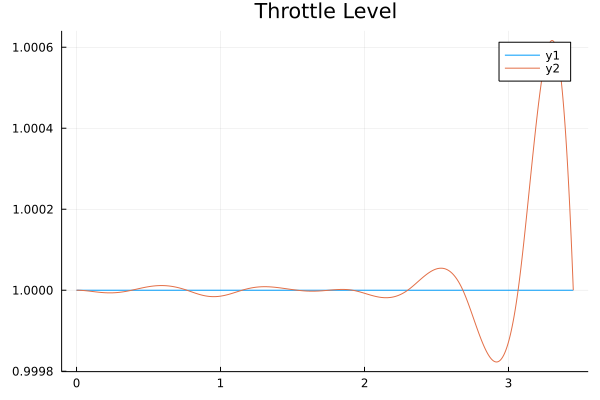

In [7]:
printSolution(sol)
plotThrottle(sol)

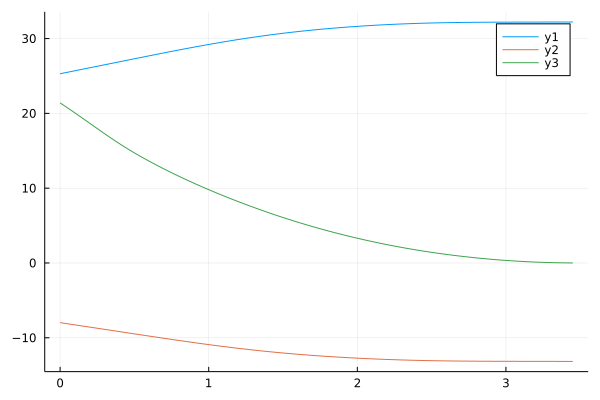

In [8]:
using LinearAlgebra, SCPToolbox, Plots

t = LinRange(0, 1, 1000)
r = mapreduce(k -> sample(sol.xc, k)[veh.id_r], hcat, t)
Plots.plot(motorTime.(t, Ref(mdl)), r')

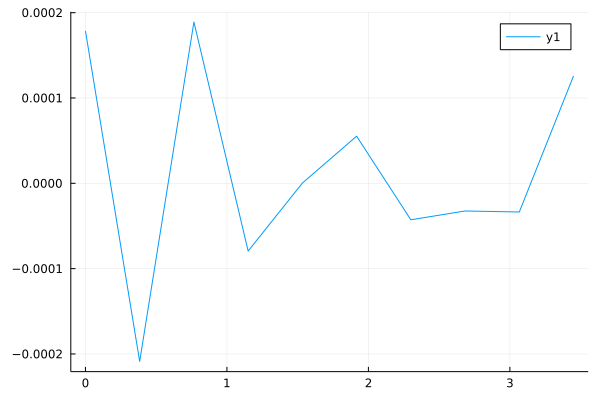

In [9]:
r = mapreduce(k -> sample(sol.uc, k)[veh.id_roll], hcat, t)
Plots.plot(motorTime.(t, Ref(mdl)), r')

In [10]:
sol.xd

19×10 Matrix{Float64}:
  25.2978        26.8318       28.3487      …   32.1981       32.2157
  -7.97335       -9.12383     -10.2619         -13.1462      -13.1593
  21.3987        16.1586       11.9091           0.255507     -9.99805e-10
   4.0            4.00557       3.84537          0.0490103     0.0498758
  -3.0           -3.00404      -2.88712         -0.0369831    -0.0373783
 -12.9884       -13.0426       -9.64845     …   -1.20988      -0.537671
   1.0            0.999968      0.999148         0.999945      0.999956
  -1.33912e-10   -0.00177235   -0.0238228       -0.00632694    1.12252e-10
  -5.44931e-10   -0.00239404   -0.0326318       -0.00818258    9.00312e-10
   1.33205e-12    0.00734987   -0.00838771       0.00139541   -0.00938862
  -8.10033e-10   -0.0426237    -0.169547    …    0.086502     -2.78105e-10
  -3.7459e-9     -0.0567807    -0.231706         0.112769     -2.28295e-9
   1.42109e-13   -0.0232166    -0.0384393       -0.0714039     2.17071e-12
   8.54557e-9     0.0047